# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [161]:
 # Подгрузим пакеты
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [162]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

Для начала определим, являются ли распределения данных нормальными

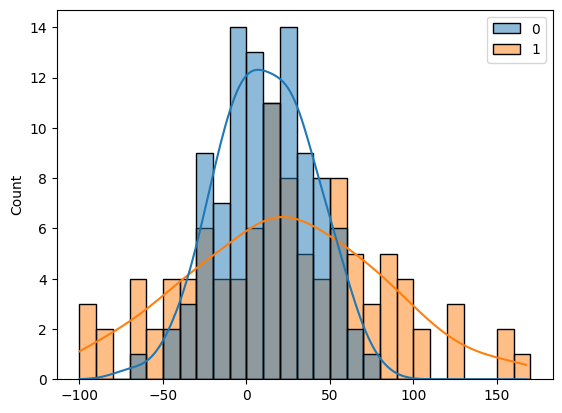

In [163]:
sns.histplot([A, B], binwidth=10, kde=True)
plt.show()

Как видно из графиков, распределения стремятся к нормальному. Наблюдения внутри каждой выборки независимы друг от друга. Используем тест Стьюдента для двух выборок.


Гипотезы:

- H0 - Средние выборок одинаковы

- H1 - Средние выборок различаются



In [164]:
stat, p = stats.ttest_ind(A, B)

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = -1.733800647210997
p = 0.08451003973499756

Не отклоняем нулевую гипотезу


<Axes: >

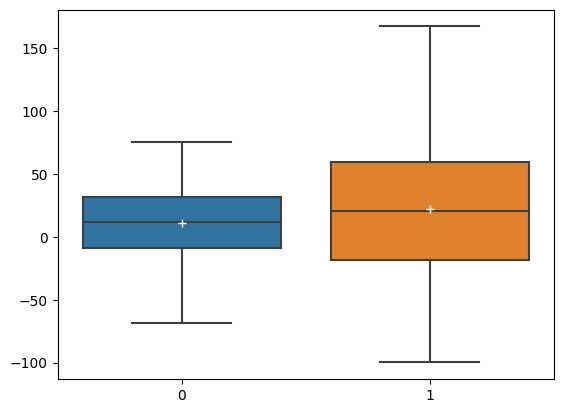

In [165]:
sns.boxplot(
    data = [A, B],
    showmeans=True,
    meanprops={
        "marker": "+",
        "markeredgecolor": "white"})

Значение  p > 0.05, поэтому не отклоняем нулевую гипотезу о том, что средние значения выборок одинаковые.

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой.
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [166]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

Гипотезы:

- H0 - Все средние значения выборок одинаковы

- H1 - Как минимум одно среднее значение отличается от остальных

In [167]:
fvalue, p = stats.f_oneway(water, nutri, mineral)

print(f'Статистика = {fvalue}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = 12.525963044834192
p = 2.9240047906326866e-05

Отклоняем нулевую гипотезу


То есть как минимум одна из групп все таки отличается от отстальных. Какая именно можно определить по графикам.

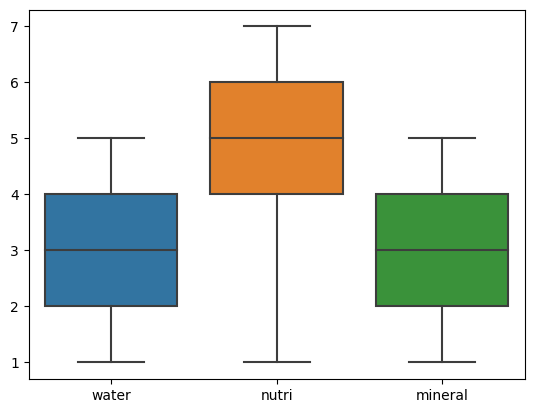

In [168]:
sns.boxplot(data=[water, nutri, mineral]).set(xticklabels = ['water', 'nutri', 'mineral'])
plt.show()

Боксплот для группы с удобрениями значительно отличается максимальным значением (7), медианой (5) и значениями межквартильного размаха (от 4 до 6) от остальных вариантов.

Группы с водой и минералкой выглядят одинаково.

<Axes: ylabel='Count'>

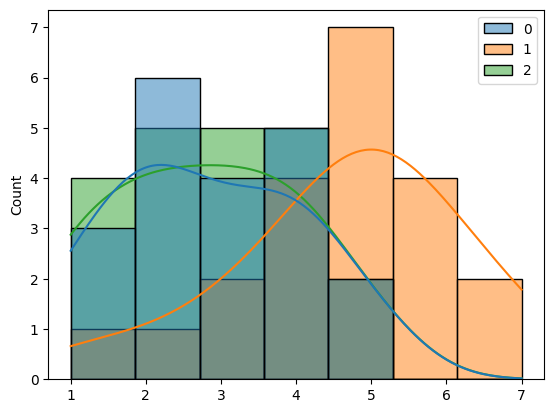

In [169]:
sns.histplot(data=[water, nutri, mineral], kde=True)

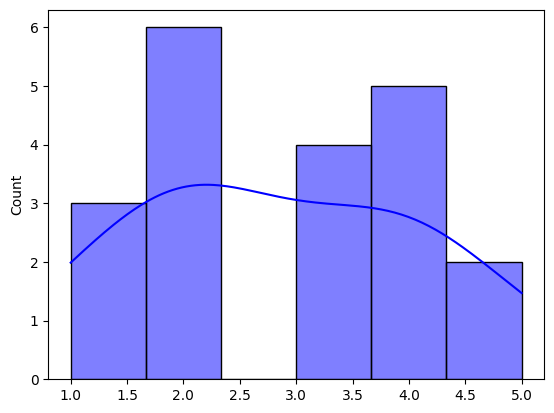

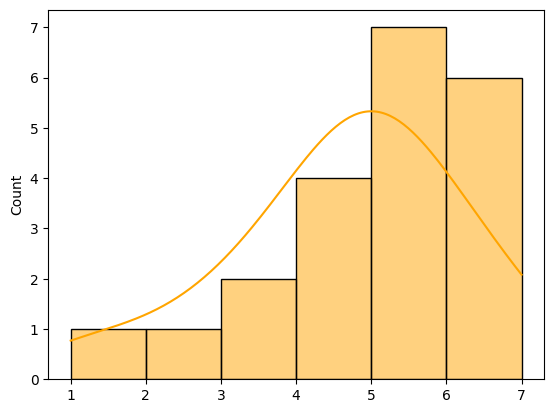

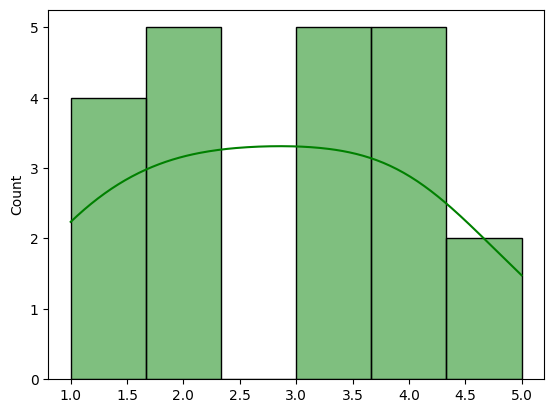

In [170]:
sns.histplot(water, kde=True, color='b')
plt.show()
sns.histplot(nutri, kde=True, color='orange')
plt.show()
sns.histplot(mineral, kde=True, color='g')
plt.show()

На гистограмме для группы с удобрениями (желтый график) так же видно, что значений в высокими показателями больше (распределение смещено вправо).

У групп с водой и минералкой чаще всего встречаются значения со средними показателями.

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [185]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

<ipython-input-185-e392f90565af>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.



#### Задание № 1
    


Провести анализ данных и сделать выводы о лучшем месте для установки ворот.

**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос.

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции.

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [172]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


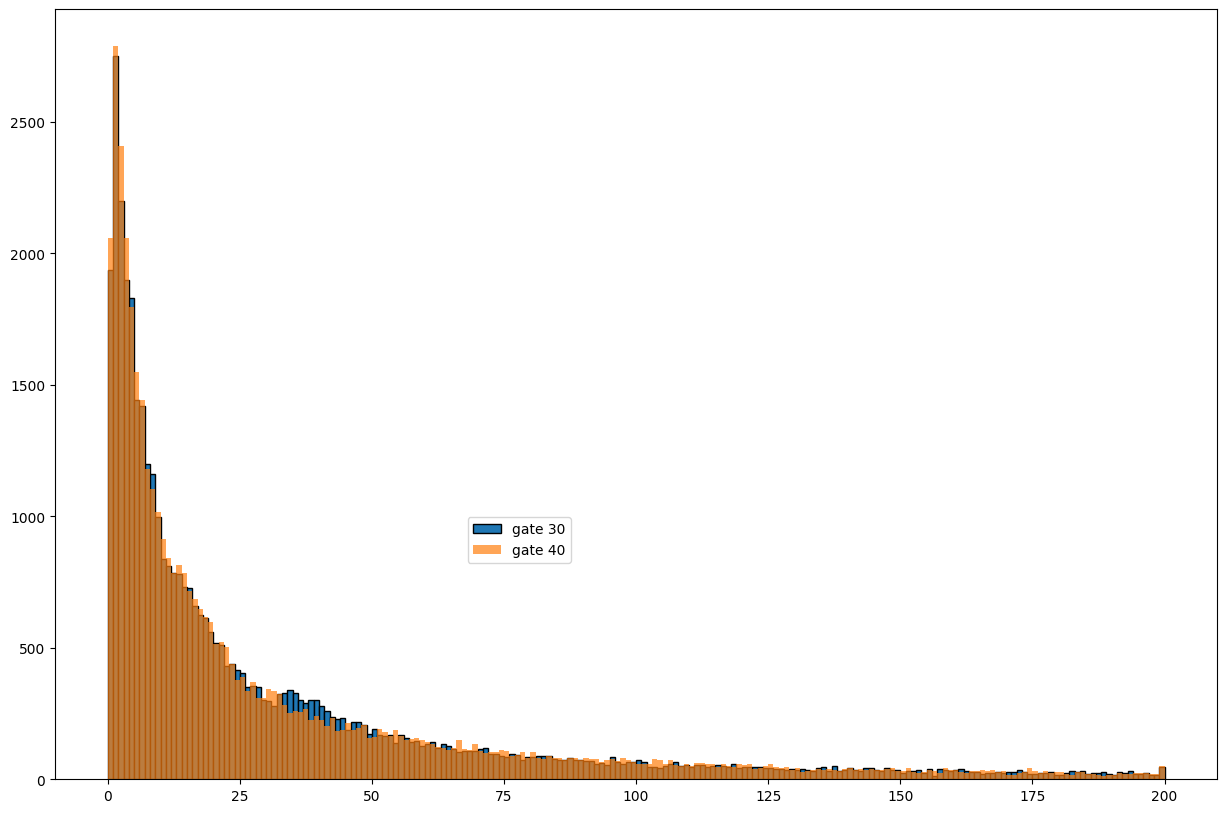

In [173]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

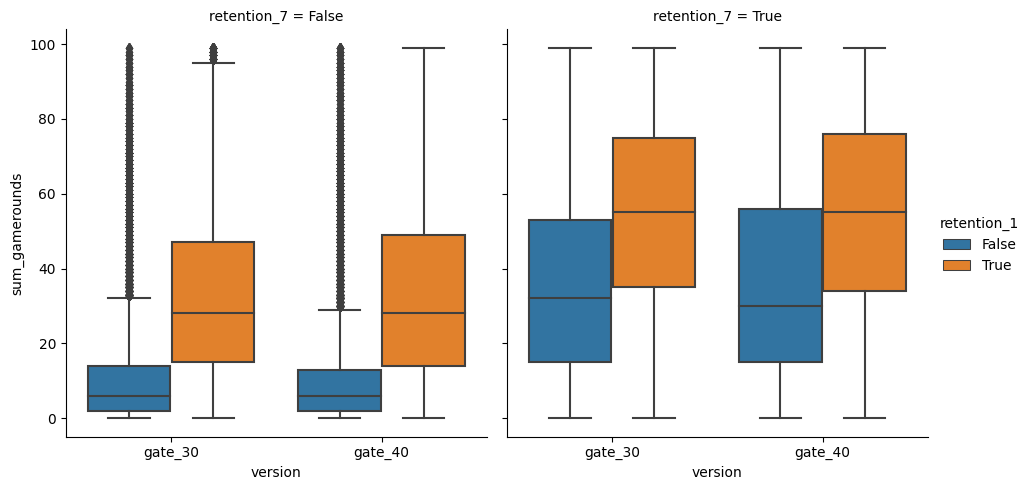

In [174]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

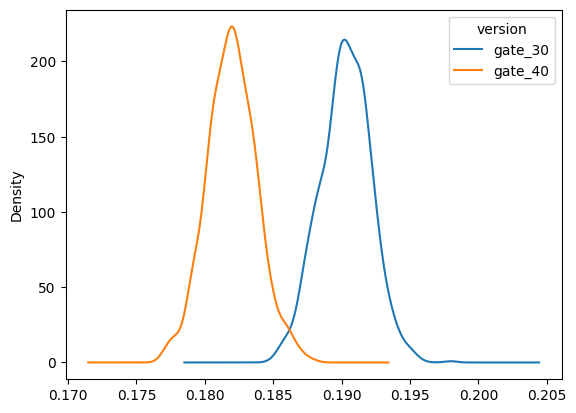

In [175]:
#Если вдруг оказалось сложно, то вот ещё один способ визуализации различий
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

<span style="color:red">**ВОТ ТУТ ЯЧЕЙКА НИЖЕ - ЭТО, ПО СУТИ, РЕШЕНИЕ ЗАДАЧИ. УБРАТЬ БЫ ЕЁ ТОГДА**</span>

In [176]:
from scipy.stats import f_oneway
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p
#stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))

(0.7939569526814368, 0.3729086824696095)

In [177]:
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

**Однофакторный дисперсионный анализ**

Гипотезы:

- H0 - Средние выборок равны

- H1 - Средние выборок не равны

In [178]:
stat, p = f_oneway(data.loc[data['version'] == 'gate_30']['sum_gamerounds'],
                       data.loc[data['version'] == 'gate_40']['sum_gamerounds'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = 0.7939569526814368
p = 0.3729086824696095

Не отклоняем нулевую гипотезу


Однофакторный дисперсионный анализ показал, что средние выборок равны (p-value больше 0.5).

**Тест Манна-Уитни**

Гипотезы:

- H0 - Распределения выборки равны

- H1 - Распределения выборки не равны



In [179]:
stat, p = mannwhitneyu(data.loc[data['version'] == 'gate_30']['sum_gamerounds'],
                       data.loc[data['version'] == 'gate_40']['sum_gamerounds'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = 1024331250.5
p = 0.05020880772044255

Не отклоняем нулевую гипотезу


Тест Манна-Уитни показал значение p-value, равное 0.5, которое скорее пограничное.

**F-тест** (для выборки, полученной после применения Bootstrap)

Гипотезы:

- H0 - Дисперсии равны

- H1 - Дисперсии не равны

In [180]:
def f_test(x, y):
    f = np.var(x, ddof=1)/np.var(y, ddof=1)
    nun = x.size-1
    dun = y.size-1
    p = 1-stats.f.cdf(f, nun, dun)
    return f, p

stat, p = f_test(boot_1d['gate_30'], boot_1d['gate_40'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = 1.0292510529300618
p = 0.3243695151653263

Не отклоняем нулевую гипотезу


Так как F-тест показал, что дисперсии равны, а выборка, полученная после применения Bootstrap, имеет распределение, близкое к нормальному, то можно применить к ней **Т-тест**

Гипотезы:

- H0 - Средние выборок равны

- H1 - Средние выборок не равны

In [181]:
stat, p = stats.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = 101.4350314319558
p = 0.0

Отклоняем нулевую гипотезу


Т-тест показал значение p-value, близкое к 0.

Поэтому отклоняем нулевую гипотезу о том, что средние значения выборок одинаковые (статистически значимая разница о том, где поставить ворота, существует).

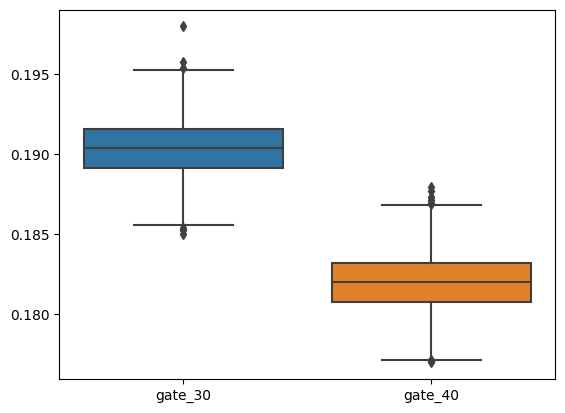

In [182]:
sns.boxplot([boot_1d['gate_30'], boot_1d['gate_40']]).set(xticklabels = ['gate_30', 'gate_40'])
plt.show()

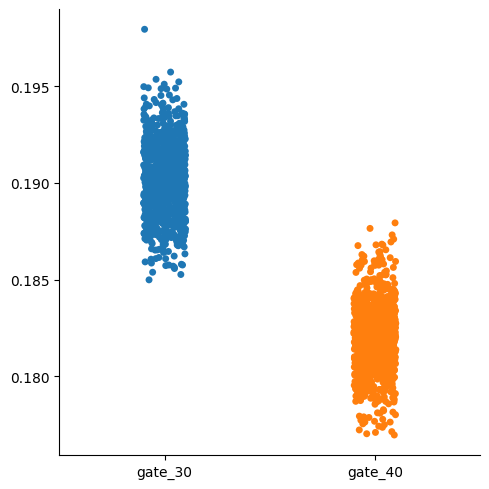

In [183]:
sns.catplot([boot_1d['gate_30'], boot_1d['gate_40']])
plt.show()

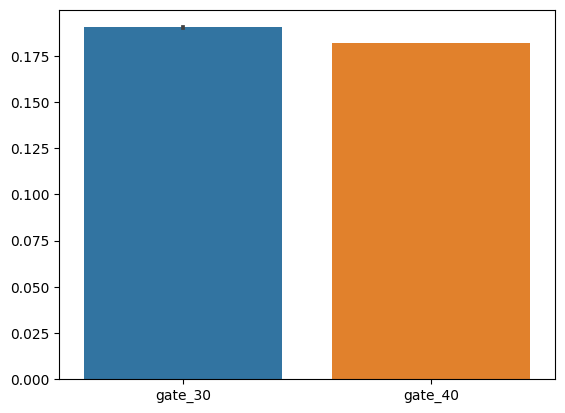

In [184]:
sns.barplot([boot_1d['gate_30'], boot_1d['gate_40']]).set(xticklabels = ['gate_30', 'gate_40'])
plt.show()

По графикам так же можно сделать вывод, что игроки с воротами на уровне 30 провели в игре времени больше.

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [186]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

<ipython-input-186-1e6d6fedfab1>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


#### **Задание № 1**


    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [187]:
pokemon_grass = pokemon[( (pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock') ) |
                        ( (pokemon['Class 1'] != 'Rock') & (pokemon['Class 2'] == 'Grass') )]
pokemon_rock = pokemon[( (pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass') ) |
                       ( (pokemon['Class 1'] != 'Grass') & (pokemon['Class 2'] == 'Rock') )]

In [188]:
grass_mean = pokemon_grass['Attack'].mean()
rock_mean = pokemon_rock['Attack'].mean()

print(f'''Среднее значение обычной атаки для класса Grass: {grass_mean}
Среднее значение обычной атаки для класса Rock: {rock_mean}''')

Среднее значение обычной атаки для класса Grass: 73.73118279569893
Среднее значение обычной атаки для класса Rock: 91.78571428571429


Гипотезы:

- H0 - Средние выборок равны

- H1 - Средние выборок не равны

In [189]:
stat, p = stats.f_oneway(pokemon_grass['Attack'], pokemon_rock['Attack'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = 13.908853861099336
p = 0.00027333381459902556

Отклоняем нулевую гипотезу


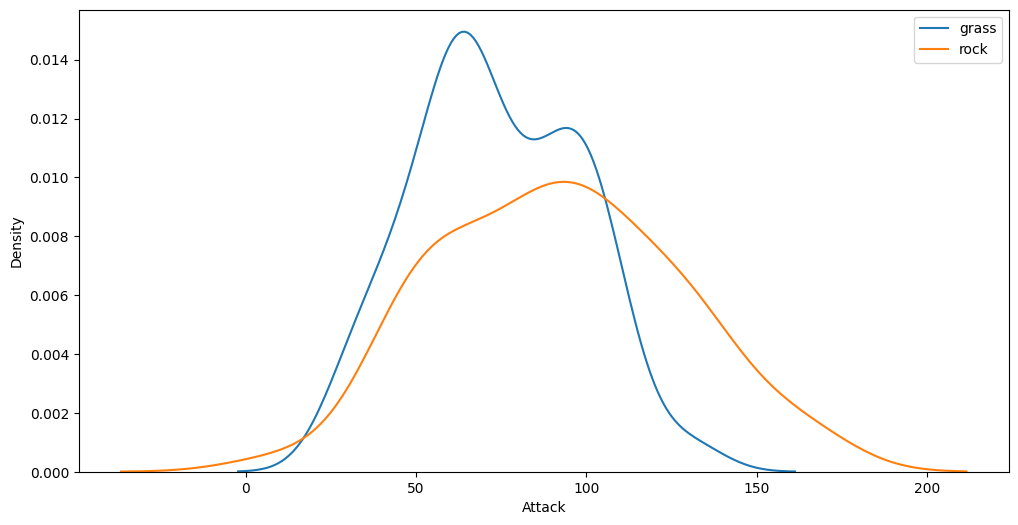

In [190]:
plt.subplots(figsize=(12, 6))
sns.kdeplot(data=pokemon_grass['Attack'], label='grass')
sns.kdeplot(data=pokemon_rock['Attack'], label='rock')
plt.legend()
plt.show()

Однофакторный дисперсионный анализ показал значение p-value, близкое к 0.

Поэтому отклоняем нулевую гипотезу о том, что средние значения выборок одинаковые.

По графику видно, что покемоны в классе Rock имеют более сильную обычную атаку, как и показал расчет средних значений. То есть профессор Оук прав.

#### **Задание № 2**

Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`.

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [191]:
pokemon_water = pokemon[( (pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal') ) |
                        ( (pokemon['Class 1'] != 'Normal') & (pokemon['Class 2'] == 'Water') )]
pokemon_normal = pokemon[( (pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water') ) |
                         ( (pokemon['Class 1'] != 'Water') & (pokemon['Class 2'] == 'Normal') )]

In [192]:
water_mean = pokemon_water['Speed'].mean()
normal_mean = pokemon_normal['Speed'].mean()

print(f'''Среднее значение скорости для класса Water: {water_mean}
Среднее значение скорости для класса Normal: {normal_mean}''')

Среднее значение скорости для класса Water: 64.936
Среднее значение скорости для класса Normal: 72.25742574257426


Гипотезы:

- H0 - Средние выборок равны

- H1 - Средние выборок не равны

In [214]:
stat, p = stats.ttest_ind(pokemon_water['Speed'], pokemon_normal['Speed'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = -2.150913330007121
p = 0.03255353551391033

Отклоняем нулевую гипотезу


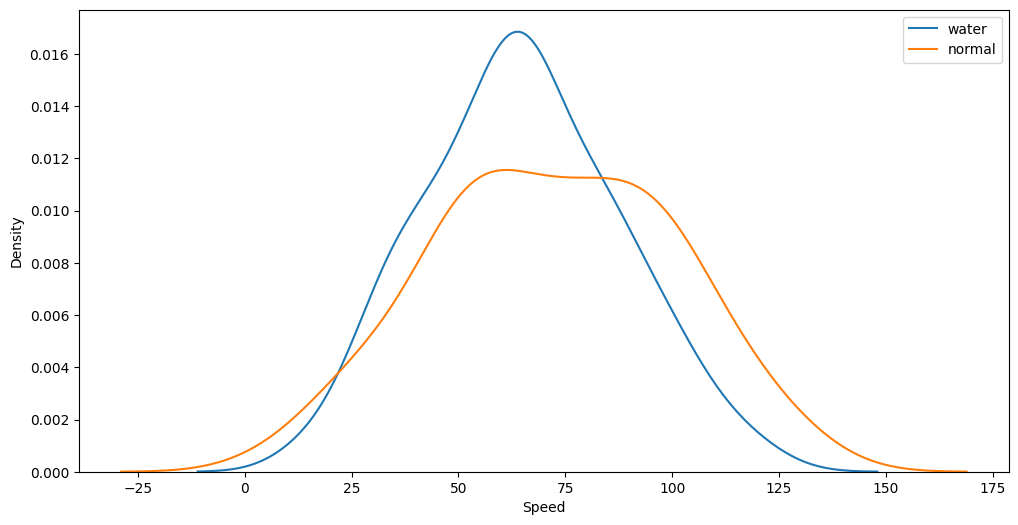

In [215]:
plt.subplots(figsize=(12, 6))
sns.kdeplot(data=pokemon_water['Speed'], label='water')
sns.kdeplot(data=pokemon_normal['Speed'], label='normal')
plt.legend()
plt.show()

T-тест показал значение p-value < 0.5.

Поэтому отклоняем нулевую гипотезу о том, что средние значения выборок одинаковые (есть статистически значимая разница между скоростью покемонов в классе Water и покемонов в классе Normal).

#### **Задание № 3**

Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона.
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`).
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [216]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [217]:
pokemon_speed_up = pokemon[pokemon['Name'].isin(treathed_pokemon)]
pokemon_other = pokemon[~pokemon['Name'].isin(treathed_pokemon)]

Гипотезы:

- H0 - Средние выборок равны

- H1 - Средние выборок не равны

In [218]:
# проверка равенства дисперсий

stat, p = f_test(pokemon_speed_up['Speed'], pokemon_other['Speed'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, равны')
else:
  print('Отклоняем нулевую гипотезу, дисперсии, вероятно, не равны')

Статистика = 0.06106453142817604
p = 0.9802410577841265

Не отклоняем нулевую гипотезу, дисперсии, вероятно, равны


In [219]:
stat, p = stats.ttest_ind(pokemon_speed_up['Speed'], pokemon_other['Speed'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = 5.385407401082377
p = 9.51510117630786e-08

Отклоняем нулевую гипотезу


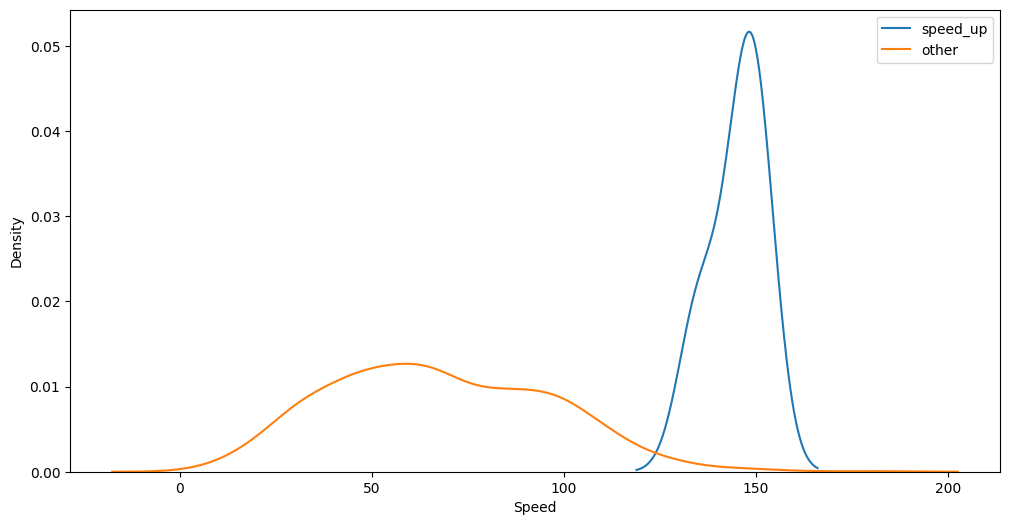

In [220]:
plt.subplots(figsize=(12, 6))
sns.kdeplot(data=pokemon_speed_up['Speed'], label='speed_up')
sns.kdeplot(data=pokemon_other['Speed'], label='other')
plt.legend()
plt.show()

T-тест показал значение p-value < 0.5.

Поэтому отклоняем нулевую гипотезу о том, что средние значения выборок одинаковые (есть статистически значимая разница между покемонами, получившими сыворотку, способную его ускорить, и покемонами, которые ее не получали).

На графике так же вижно, что средние отличаются. Скорость у покемонов, получивших сыворотку, больше.

#### **Задание № 4**

Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов.
Оук предложил разобраться в этом Вам.

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [221]:
pokemon_legendary = pokemon[pokemon['Legendary']]
pokemon_other = pokemon[~pokemon['Legendary']]

Сумма характеристик HP, Attack, Defense:

In [222]:
pokemon_legendary['Sum of features'] = pokemon_legendary[['HP', 'Attack', 'Defense']].sum(axis = 1)
pokemon_other['Sum of features'] = pokemon_other[['HP', 'Attack', 'Defense']].sum(axis = 1)

<ipython-input-222-13b6d71815ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_legendary['Sum of features'] = pokemon_legendary[['HP', 'Attack', 'Defense']].sum(axis = 1)
<ipython-input-222-13b6d71815ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_other['Sum of features'] = pokemon_other[['HP', 'Attack', 'Defense']].sum(axis = 1)


In [223]:
# проверка равенства дисперсий

stat, p = f_test(pokemon_legendary['Sum of features'], pokemon_other['Sum of features'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, равны')
else:
  print('Отклоняем нулевую гипотезу, дисперсии, вероятно, не равны')

Статистика = 0.5204360643102193
p = 0.9992753908383266

Не отклоняем нулевую гипотезу, дисперсии, вероятно, равны


In [224]:
stat, p = stats.ttest_ind(pokemon_legendary['Sum of features'], pokemon_other['Sum of features'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = 11.591852366462316
p = 7.970942205722087e-29

Отклоняем нулевую гипотезу


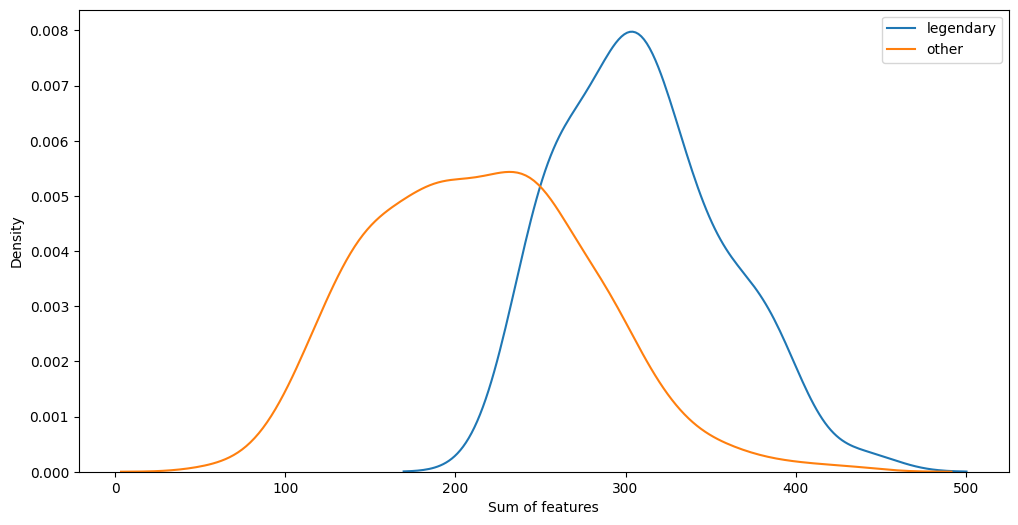

In [225]:
plt.subplots(figsize=(12, 6))
sns.kdeplot(data=pokemon_legendary['Sum of features'], label='legendary')
sns.kdeplot(data=pokemon_other['Sum of features'], label='other')
plt.legend()
plt.show()

T-тест показал значение p-value < 0.5.

Поэтому отклоняем нулевую гипотезу о том, что средние значения выборок одинаковые (есть статистически значимая разница между легендарными покемонами и остальными).

На графике так же вижно, что средние отличаются. Сумма характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов.

Произведение характеристик HP, Attack, Defense:

In [226]:
pokemon_legendary['Prod of features'] = pokemon_legendary[['HP', 'Attack', 'Defense']].prod(axis = 1)
pokemon_other['Prod of features'] = pokemon_other[['HP', 'Attack', 'Defense']].prod(axis = 1)

<ipython-input-226-8f0955895bd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_legendary['Prod of features'] = pokemon_legendary[['HP', 'Attack', 'Defense']].prod(axis = 1)
<ipython-input-226-8f0955895bd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_other['Prod of features'] = pokemon_other[['HP', 'Attack', 'Defense']].prod(axis = 1)


In [227]:
# проверка равенства дисперсий

stat, p = f_test(pokemon_legendary['Prod of features'],
                 pokemon_other['Prod of features'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, равны')
else:
  print('Отклоняем нулевую гипотезу, дисперсии, вероятно, не равны')

Статистика = 1.9381592096283669
p = 3.3248655495587975e-05

Отклоняем нулевую гипотезу, дисперсии, вероятно, не равны


In [228]:
stat, p = stats.ttest_ind(pokemon_legendary['Prod of features'],
                          pokemon_other['Prod of features'],
                          equal_var = False)

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = 10.079078507434385
p = 2.895038880907388e-15

Отклоняем нулевую гипотезу


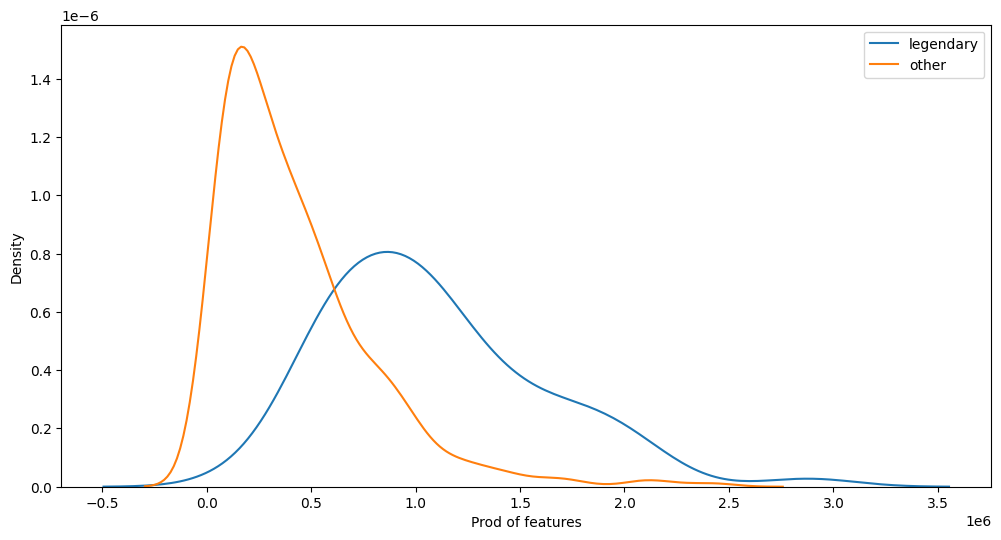

In [229]:
plt.subplots(figsize=(12, 6))
sns.kdeplot(data=pokemon_legendary['Prod of features'], label='legendary')
sns.kdeplot(data=pokemon_other['Prod of features'], label='other')
plt.legend()
plt.show()

T-тест показал значение p-value < 0.5.

Поэтому отклоняем нулевую гипотезу о том, что средние значения выборок одинаковые (есть статистически значимая разница между легендарными покемонами и остальными).

На графике так же вижно, что средние отличаются. Произведение характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов.

#### **Задание № 5**

Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь!

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [230]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [231]:
pokemon_rock = pokemon[(pokemon['Class 1'] == best_defence_class[0]) |
                       (pokemon['Class 2'] == best_defence_class[0])]
pokemon_ground = pokemon[(pokemon['Class 1'] == best_defence_class[1]) |
                       (pokemon['Class 2'] == best_defence_class[1])]
pokemon_steel = pokemon[(pokemon['Class 1'] == best_defence_class[2]) |
                       (pokemon['Class 2'] == best_defence_class[2])]
pokemon_ice = pokemon[(pokemon['Class 1'] == best_defence_class[3]) |
                       (pokemon['Class 2'] == best_defence_class[3])]

Гипотезы:

- H0 - Все средние значения выборок одинаковы

- H1 - Как минимум одно среднее значение отличается от остальных

In [232]:
fvalue, p = stats.f_oneway(pokemon_rock['Defense'],
                           pokemon_ground['Defense'],
                           pokemon_steel['Defense'],
                           pokemon_ice['Defense'] )

print(f'Статистика = {fvalue}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = 10.82012408304731
p = 1.231528168152447e-06

Отклоняем нулевую гипотезу


То есть как минимум один из классов по силе обычной защиты все таки отличается от остальных (классы покемонов статистически значимо отличаются по уровню защиты).

Как именно они отличаются можно определить по графикам.

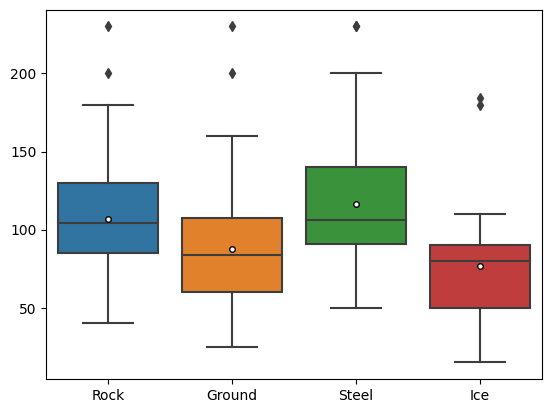

In [233]:
sns.boxplot(data=[pokemon_rock['Defense'],
                  pokemon_ground['Defense'],
                  pokemon_steel['Defense'],
                  pokemon_ice['Defense']],
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markersize":"4",
                       "markeredgecolor":"black"}
            ).set(xticklabels=best_defence_class)
plt.show()

In [234]:
means = [pokemon_rock['Defense'].mean(), pokemon_ground['Defense'].mean(),
         pokemon_steel['Defense'].mean(), pokemon_ice['Defense'].mean()]
pokemon_means = dict(zip(best_defence_class, means))
pokemon_means

{'Rock': 107.08620689655173,
 'Ground': 87.70149253731343,
 'Steel': 116.61224489795919,
 'Ice': 76.65789473684211}

Боксплоты для классов Rock и Steel отличаются от боксплотов для классов Ground и Ice. Медианы на графиков для Rock и Steel выше и значения межквартильного размаха больше.

Расчет средних так де показал, что среднее значение силы обычной защиты больше у классов Rock и Steel (107.1 и 116.6, соответственно).